#Cleaning And Mearging Of Excel Sheet

In [ ]:
import pandas as pd
import numpy as np

path = "marks_dataset.xlsx"

# ----------------------------
# REQUIRED FINAL COLUMNS
# ----------------------------
FINAL_COLS = [
    "As:1","As:2","As:3","As:4","As:5","As:6",
    "Qz:1","Qz:2","Qz:3","Qz:4","Qz:5","Qz:6","Qz:7",
    "S-I","S-II","Final"
]

# ----------------------------
# FUNCTION TO PROCESS EACH SHEET
# ----------------------------
def process_sheet(df):
    """
    df contains:
    Row 0 -> Weightage
    Row 1 -> Total
    Row 2 -> Sr#
    Row 3+ -> Data
    """
    weightage_raw = df.iloc[0]
    total_raw = df.iloc[1]

    # Convert headers
    weightage = pd.to_numeric(weightage_raw, errors="coerce").fillna(0)
    total = pd.to_numeric(total_raw, errors="coerce").fillna(0)

    # Clean data rows
    df = df.iloc[3:].reset_index(drop=True)
    df = df.apply(pd.to_numeric, errors="coerce").fillna(0)

    weighted_df = pd.DataFrame()

    for col in df.columns:
        col_score = df[col]

        w = weightage[col] if col in weightage.index else 0
        t = total[col] if col in total.index else 0

        # Only weighted for As/Qz columns
        if col not in [
            "As:1","As:2","As:3","As:4","As:5","As:6",
            "Qz:1","Qz:2","Qz:3","Qz:4","Qz:5","Qz:6","Qz:7"
        ]:
            weighted_df[col] = 0
            continue

        if w == 0 or t == 0:
            weighted_df[col] = 0
            continue

        weighted_df[col] = (col_score / t) * w

    weighted_df = weighted_df.fillna(0)

    return weighted_df, df  # weighted + raw

# ----------------------------
# PROCESS ALL 6 SHEETS
# ----------------------------
all_dfs = []

for sheet in ["1","2","3","4","5","6"]:
    raw = pd.read_excel(path, sheet_name=sheet)
    weighted, original = process_sheet(raw)

    # Add missing cols
    for col in FINAL_COLS:
        if col not in weighted.columns:
            weighted[col] = 0

    # Replace S-I / S-II / Final with raw values
    for col in ["S-I", "S-II", "Final"]:
        if col in original.columns:
            weighted[col] = pd.to_numeric(original[col], errors="coerce").fillna(0)
        else:
            weighted[col] = 0

    # Final column order
    weighted = weighted[FINAL_COLS]

    all_dfs.append(weighted)

# ----------------------------
# MERGE ALL SHEETS
# ----------------------------
full_df = pd.concat(all_dfs, ignore_index=True).fillna(0)

# ----------------------------
# AQ SUM COLUMNS
# ----------------------------

as_cols = [c for c in ["As:1","As:2","As:3","As:4","As:5","As:6"] if c in full_df.columns]
qz_cols = [c for c in ["Qz:1","Qz:2","Qz:3","Qz:4","Qz:5","Qz:6","Qz:7"] if c in full_df.columns]

# Best 4 assignments
full_df["A_Sum"] = full_df[as_cols].apply(lambda row: row.nlargest(4).sum(), axis=1)

# Best 6 quizzes
full_df["Q_Sum"] = full_df[qz_cols].apply(lambda row: row.nlargest(6).sum(), axis=1)

# Combined predictor
full_df["AQ_Sum"] = full_df["A_Sum"] + full_df["Q_Sum"]

# ----------------------------
# SAVE CLEAN DATASET
# ----------------------------
full_df.to_csv("clean_weighted_dataset.csv", index=False)

full_df.head()


,As:1,As:2,As:3,As:4,As:5,As:6,Qz:1,Qz:2,Qz:3,Qz:4,Qz:5,Qz:6,Qz:7,S-I,S-II,Final,A_Sum,Q_Sum,AQ_Sum
0,1.857692,2.592857,2.450000,2.43,1.4750,2.350000,1.4,0.666667,0.4,1.6,0.0,1.0,1.500000,6.56,2.34,16.08,9.822857,6.566667,16.389524
1,1.673077,2.914286,1.300000,2.10,2.0125,2.366667,1.0,0.933333,0.0,2.0,1.4,2.0,1.666667,4.68,4.12,24.07,9.393452,9.000000,18.393452
2,2.607692,2.657143,0.000000,2.82,2.0000,2.666667,1.4,0.333333,0.2,0.2,0.4,0.4,2.000000,3.56,2.43,14.62,10.751502,4.733333,15.484835
3,1.407692,1.864286,0.000000,1.32,0.0000,1.666667,0.6,0.666667,0.1,0.0,0.0,0.4,0.500000,6.93,3.37,12.60,6.258645,2.266667,8.525311
4,2.400000,2.871429,2.416667,2.70,3.0000,3.000000,2.0,1.400000,2.0,2.0,1.3,2.0,1.500000,10.68,6.56,33.63,11.571429,10.900000,22.471429


In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   As:1    254 non-null    float64
 1   As:2    254 non-null    float64
 2   As:3    254 non-null    float64
 3   As:4    254 non-null    float64
 4   As:5    254 non-null    float64
 5   As:6    254 non-null    float64
 6   Qz:1    254 non-null    float64
 7   Qz:2    254 non-null    float64
 8   Qz:3    254 non-null    float64
 9   Qz:4    254 non-null    float64
 10  Qz:5    254 non-null    float64
 11  Qz:6    254 non-null    float64
 12  Qz:7    254 non-null    float64
 13  S-I     254 non-null    float64
 14  S-II    254 non-null    float64
 15  Final   254 non-null    float64
 16  A_Sum   254 non-null    float64
 17  Q_Sum   254 non-null    float64
 18  AQ_Sum  254 non-null    float64
dtypes: float64(19)
memory usage: 37.8 KB


#EDA

Shape of dataset: (254, 19)


,As:1,As:2,As:3,As:4,As:5,As:6,Qz:1,Qz:2,Qz:3,Qz:4,Qz:5,Qz:6,Qz:7,S-I,S-II,Final,A_Sum,Q_Sum,AQ_Sum
0,1.857692,2.592857,2.450000,2.43,1.4750,2.350000,1.4,0.666667,0.4,1.6,0.0,1.0,1.500000,6.56,2.34,16.08,9.822857,6.566667,16.389524
1,1.673077,2.914286,1.300000,2.10,2.0125,2.366667,1.0,0.933333,0.0,2.0,1.4,2.0,1.666667,4.68,4.12,24.07,9.393452,9.000000,18.393452
2,2.607692,2.657143,0.000000,2.82,2.0000,2.666667,1.4,0.333333,0.2,0.2,0.4,0.4,2.000000,3.56,2.43,14.62,10.751502,4.733333,15.484835
3,1.407692,1.864286,0.000000,1.32,0.0000,1.666667,0.6,0.666667,0.1,0.0,0.0,0.4,0.500000,6.93,3.37,12.60,6.258645,2.266667,8.525311
4,2.400000,2.871429,2.416667,2.70,3.0000,3.000000,2.0,1.400000,2.0,2.0,1.3,2.0,1.500000,10.68,6.56,33.63,11.571429,10.900000,22.471429


,As:1,As:2,As:3,As:4,As:5,As:6,Qz:1,Qz:2,Qz:3,Qz:4,Qz:5,Qz:6,Qz:7,S-I,S-II,Final,A_Sum,Q_Sum,AQ_Sum
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,1.936466,2.011330,2.180995,2.026045,1.265816,0.498999,0.871563,0.626052,0.773469,0.734209,0.679945,0.808059,0.455928,6.719213,5.815079,19.320591,9.019306,4.853803,13.873109
std,1.004554,1.065219,0.924423,1.100010,1.356124,0.982179,0.594490,0.508169,0.499825,0.619207,0.564752,0.593533,0.574867,2.576263,3.308679,8.787371,2.701693,2.085864,4.219058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.560000,0.000000,2.180000,0.000000,0.675000,1.375000
25%,1.285078,1.760937,1.690000,1.395937,0.000000,0.000000,0.308000,0.166000,0.381250,0.200000,0.200000,0.200000,0.000000,4.750000,3.142500,13.180000,7.319219,3.382000,11.078281
50%,2.006875,2.383333,2.433750,2.356250,0.767187,0.000000,0.900000,0.600000,0.750000,0.645000,0.600000,0.800000,0.000000,6.750000,5.370000,18.315000,9.311684,4.657333,13.967580
75%,2.812500,2.762500,2.812500,2.837813,2.482031,0.000000,1.300000,1.000000,1.125000,1.200000,1.162000,1.300000,0.830000,8.430000,8.170000,25.347500,10.801172,6.403625,16.828859
max,3.703125,3.656250,3.718750,3.750000,3.750000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,14.000000,15.000000,41.290000,14.687500,11.445000,24.152500



Missing values per column:
As:1      0
As:2      0
As:3      0
As:4      0
As:5      0
As:6      0
Qz:1      0
Qz:2      0
Qz:3      0
Qz:4      0
Qz:5      0
Qz:6      0
Qz:7      0
S-I       0
S-II      0
Final     0
A_Sum     0
Q_Sum     0
AQ_Sum    0
dtype: int64


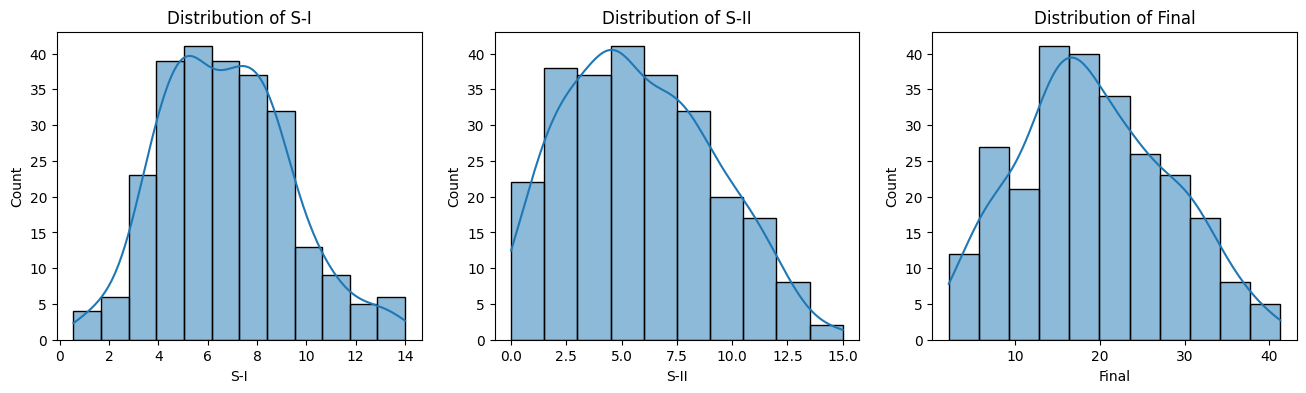

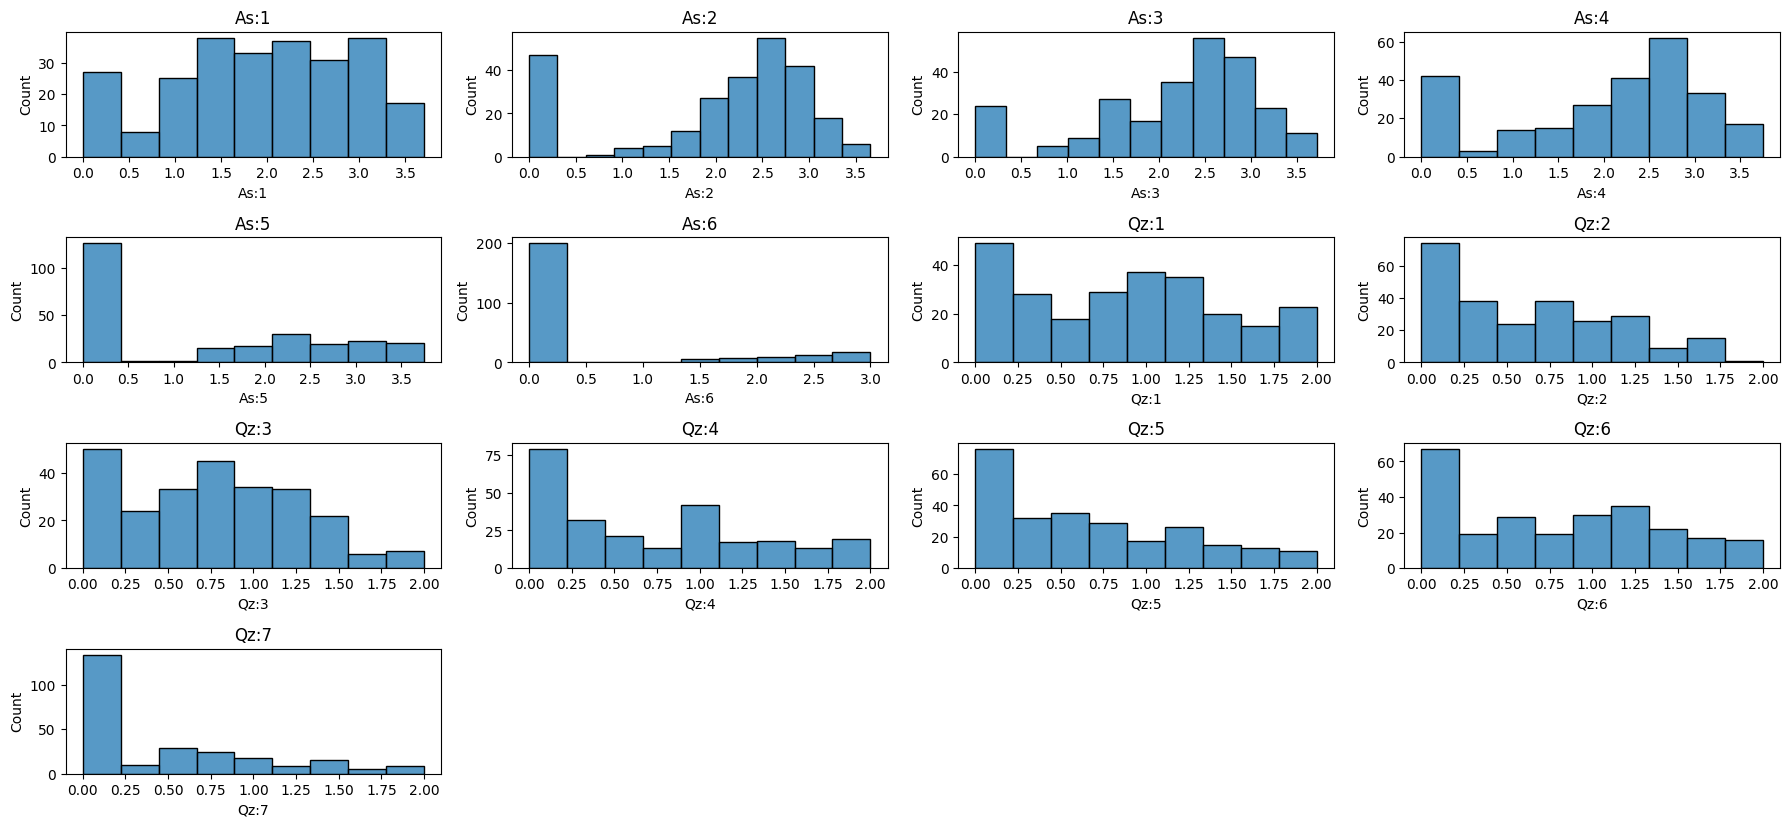

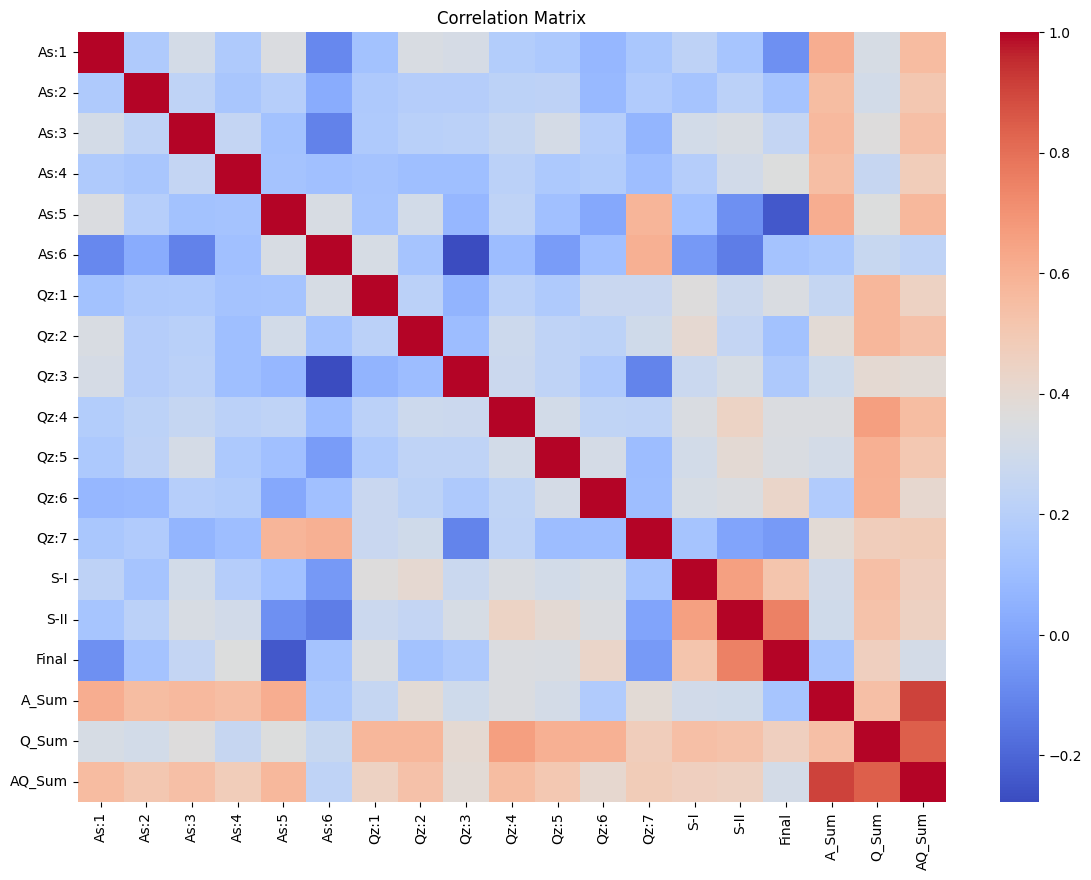


Correlation with Midterm I (S-I):


,S-I
S-I,1.000000
S-II,0.657011
Q_Sum,0.543641
Final,0.516429
AQ_Sum,0.463006
Qz:2,0.402405
Qz:1,0.365832
Qz:4,0.345100
Qz:6,0.330625
Qz:5,0.308058



Correlation with Midterm II (S-II):


,S-II
S-II,1.000000
Final,0.752249
S-I,0.657011
Q_Sum,0.529603
AQ_Sum,0.452236
Qz:4,0.444291
Qz:5,0.394079
Qz:6,0.346478
As:3,0.331478
Qz:3,0.329863



Correlation with Final:


,Final
Final,1.000000
S-II,0.752249
S-I,0.516429
Q_Sum,0.462206
Qz:6,0.430458
As:4,0.360543
Qz:4,0.347886
Qz:1,0.344354
Qz:5,0.342870
AQ_Sum,0.316151


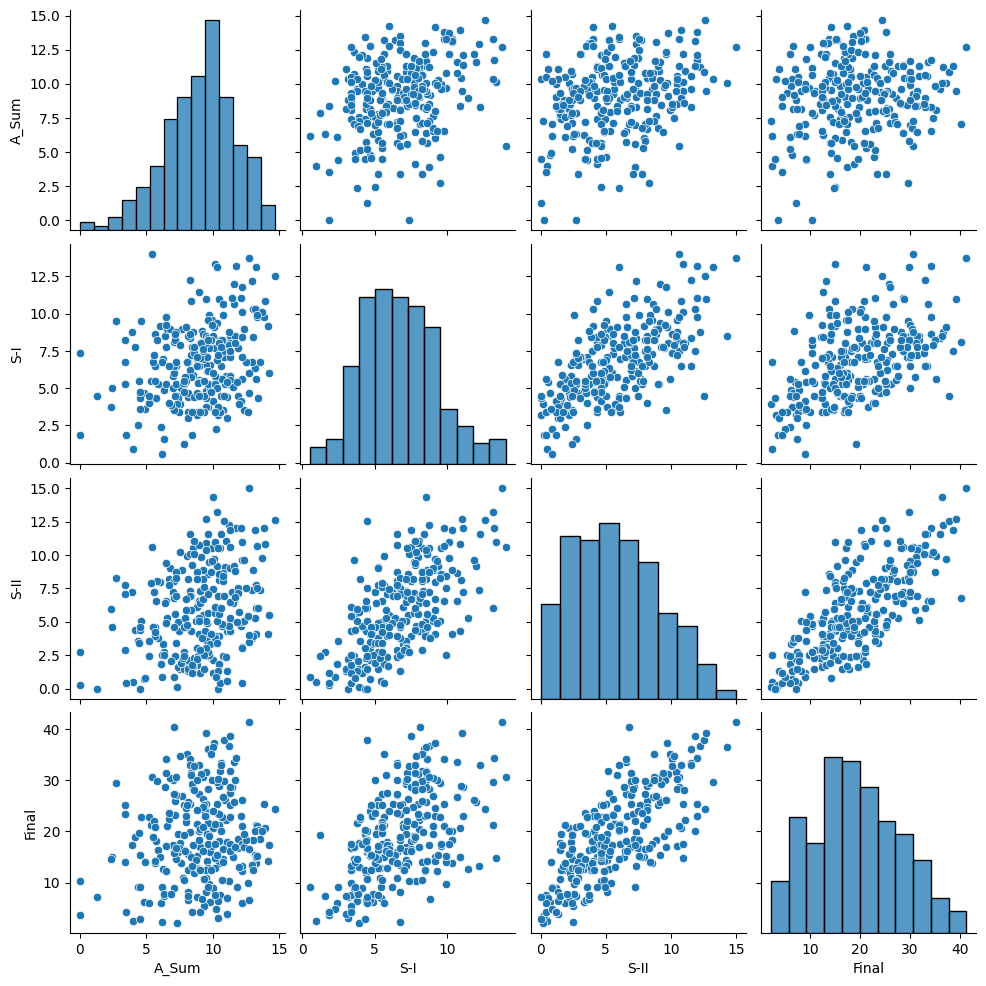

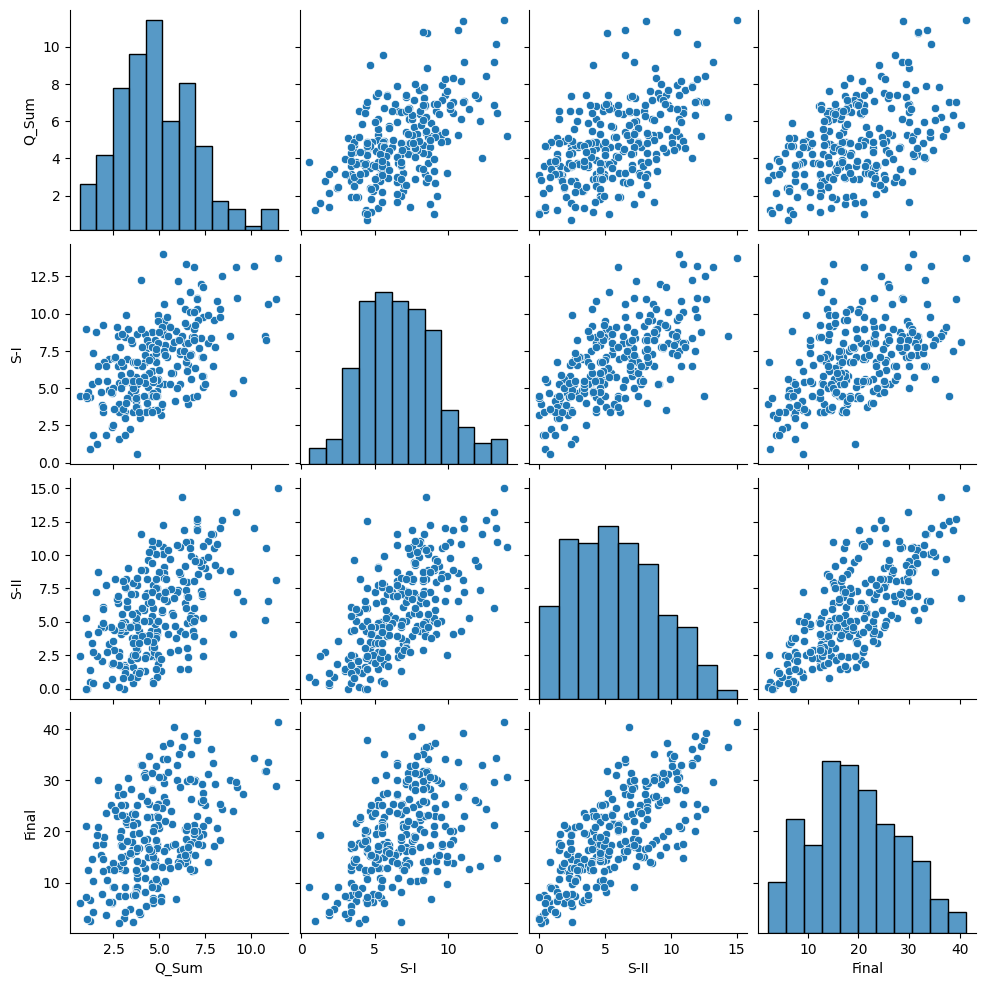

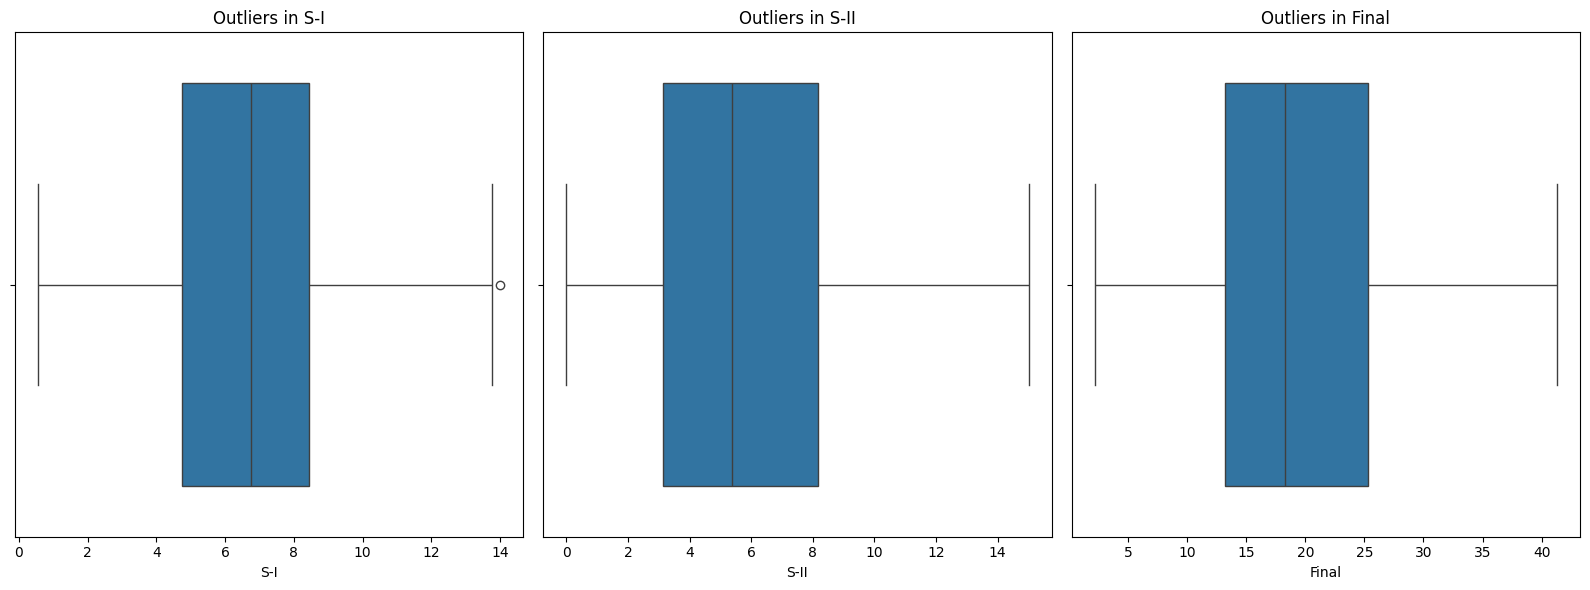

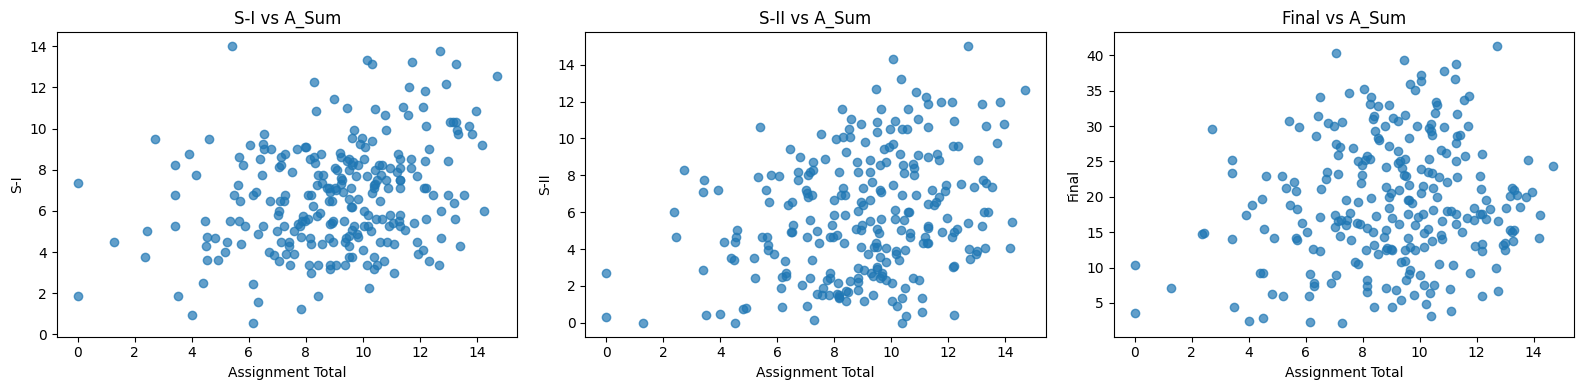

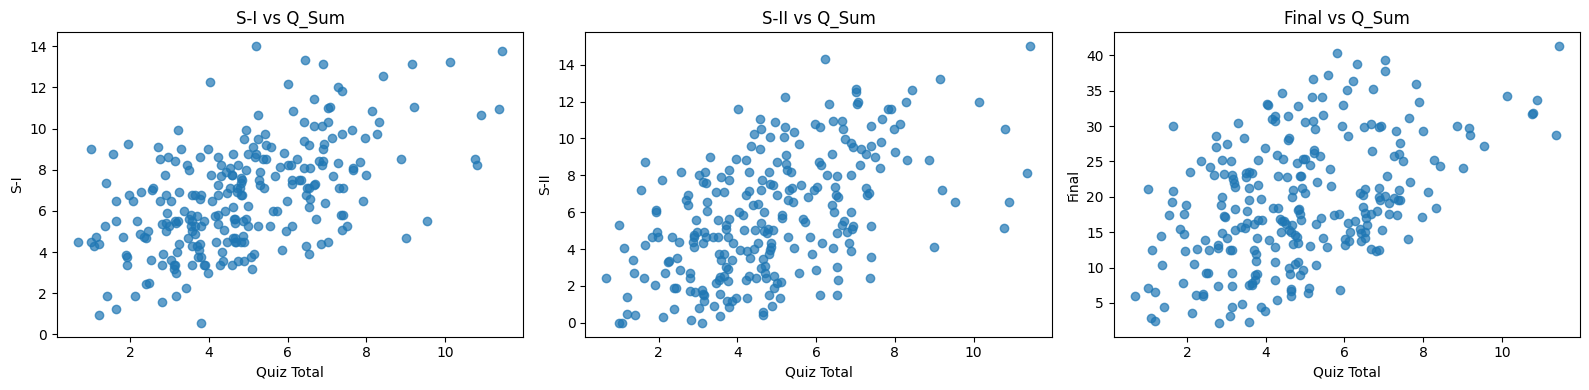

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------------
# 1) BASIC STRUCTURE CHECK
# ------------------------------------------------------------------

print("Shape of dataset:", full_df.shape)
display(full_df.head())
display(full_df.describe())

print("\nMissing values per column:")
print(full_df.isna().sum())

# ------------------------------------------------------------------
# 2) DISTRIBUTIONS OF TARGET VARIABLES
# ------------------------------------------------------------------

targets = ["S-I", "S-II", "Final"]

plt.figure(figsize=(16, 4))
for i, t in enumerate(targets):
    plt.subplot(1, 3, i+1)
    sns.histplot(full_df[t], kde=True)
    plt.title(f"Distribution of {t}")
plt.show()

# ------------------------------------------------------------------
# 3) DISTRIBUTIONS OF ASSIGNMENTS + QUIZZES
# ------------------------------------------------------------------

aq_cols = ["As:1","As:2","As:3","As:4","As:5","As:6",
           "Qz:1","Qz:2","Qz:3","Qz:4","Qz:5","Qz:6","Qz:7"]

plt.figure(figsize=(18, 10))
for i, col in enumerate(aq_cols):
    plt.subplot(5, 4, i+1)
    sns.histplot(full_df[col], kde=False)
    plt.title(col)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 4) HEATMAP (CORRELATION MATRIX)
# ------------------------------------------------------------------

plt.figure(figsize=(14, 10))
corr = full_df.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# ------------------------------------------------------------------
# 5) CORRELATION WITH TARGETS
# ------------------------------------------------------------------

print("\nCorrelation with Midterm I (S-I):")
display(corr["S-I"].sort_values(ascending=False))

print("\nCorrelation with Midterm II (S-II):")
display(corr["S-II"].sort_values(ascending=False))

print("\nCorrelation with Final:")
display(corr["Final"].sort_values(ascending=False))

# ------------------------------------------------------------------
# 6) PAIRPLOTS FOR TARGET RELATIONSHIPS
# ------------------------------------------------------------------

sns.pairplot(full_df[["A_Sum", "S-I", "S-II", "Final"]])
plt.show()

sns.pairplot(full_df[["Q_Sum", "S-I", "S-II", "Final"]])
plt.show()
# ------------------------------------------------------------------
# 7) BOX PLOTS FOR OUTLIERS
# ------------------------------------------------------------------

plt.figure(figsize=(16, 6))
for i, t in enumerate(targets):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=full_df[t])
    plt.title(f"Outliers in {t}")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 8) SCATTER RELATIONSHIPS WITH AQ_SUM
# ------------------------------------------------------------------

plt.figure(figsize=(16, 4))
for i, t in enumerate(targets):
    plt.subplot(1, 3, i+1)
    plt.scatter(full_df["A_Sum"], full_df[t], alpha=0.7)
    plt.title(f"{t} vs A_Sum")
    plt.xlabel("Assignment Total")
    plt.ylabel(t)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 4))
for i, t in enumerate(targets):
    plt.subplot(1, 3, i+1)
    plt.scatter(full_df["Q_Sum"], full_df[t], alpha=0.7)
    plt.title(f"{t} vs Q_Sum")
    plt.xlabel("Quiz Total")
    plt.ylabel(t)
plt.tight_layout()
plt.show()


#Now Predicting For RQ1

Samples: 254
Features: ['A_Sum', 'Q_Sum']

Test results (sorted by MAE):
             Model  MAE_test  RMSE_test   R2_test
0  Polynomial_deg2  1.625153   1.980643  0.336477
1   MultipleLinear  1.625870   1.990228  0.330040
2       Dummy_mean  1.938590   2.446808 -0.012612

Bootstrap MAE (train-based) 95% CI:
             Model  MAE_mean_boot  MAE_CI_lower  MAE_CI_upper
0   MultipleLinear       1.774158      1.757372      1.808413
1  Polynomial_deg2       1.784017      1.756463      1.835116
2       Dummy_mean       2.124212      2.117835      2.152754

Best model on test set: Polynomial_deg2

Train vs Test metrics for best model:
   Split       MAE      RMSE        R2
0  Train  1.749756  2.188655  0.292599
1   Test  1.625153  1.980643  0.336477

Comparison table (test metrics + bootstrap CI):
             Model  MAE_test  RMSE_test   R2_test  MAE_mean_boot  \
0  Polynomial_deg2  1.625153   1.980643  0.336477       1.784017   
1   MultipleLinear  1.625870   1.990228  0.330040       1.77

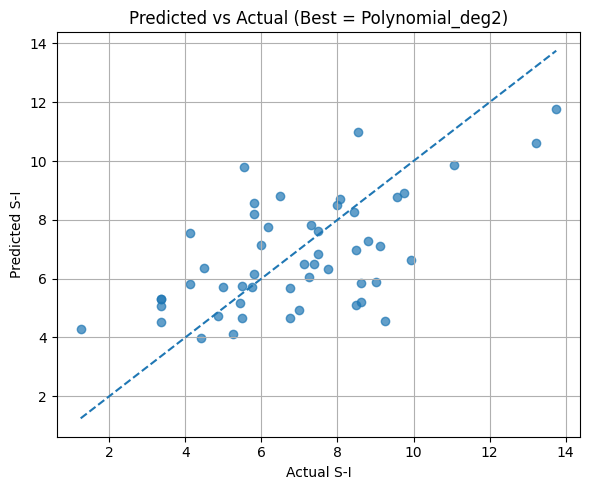


All RQ1 outputs saved to folder: rq1_outputs
Files: rq1_test_results.csv, rq1_bootstrap_mae_ci.csv, rq1_best_train_test_metrics.csv, rq1_comparison_table.csv, rq1_pred_vs_actual_best.png

Interpretation notes:
- Use test MAE/RMSE/R2 to compare models (lower MAE/RMSE better; higher R2 better).
- Bootstrap MAE CI (train-based) shows training-set variability: narrow CI -> stable model; wide CI -> unstable.
- If Train MAE << Test MAE and Train R2 >> Test R2 -> possible overfitting.
- If both Train and Test metrics are poor -> underfitting / weak features.


In [ ]:
# RQ1: Predict Midterm I (S-I)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os

# -----------------------------
# Config
# -----------------------------
DATA_PATH = "/content/clean_weighted_dataset.csv"
OUT_DIR = "rq1_outputs"
RANDOM_STATE = 42
TEST_SIZE = 0.20
BOOTSTRAP_SAMPLES = 500

os.makedirs(OUT_DIR, exist_ok=True)

# -----------------------------
# Load data
# -----------------------------
df = pd.read_csv(DATA_PATH)

# Make sure required columns exist
for col in ["A_Sum","Q_Sum","AQ_Sum","S-I"]:
    if col not in df.columns:
        raise ValueError(f"Required column '{col}' not found in {DATA_PATH}")

# Predictors: domain-safe => only A_Sum and Q_Sum (no mid2/final)
X = df[["A_Sum", "Q_Sum"]].astype(float)
y = pd.to_numeric(df["S-I"], errors="coerce").fillna(0).astype(float)

# Quick check
print("Samples:", X.shape[0])
print("Features:", X.columns.tolist())

# -----------------------------
# Train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

# -----------------------------
# Define models
# -----------------------------
models = {
    "MultipleLinear": LinearRegression(),
    "Polynomial_deg2": make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression()),
    "Dummy_mean": DummyRegressor(strategy="mean")
}

# -----------------------------
# Train and evaluate on TEST set
# -----------------------------
results = []
fitted_models = {}

for name, m in models.items():
    m.fit(X_train, y_train)
    fitted_models[name] = m
    y_pred_test = m.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = mean_squared_error(y_test, y_pred_test) ** 0.5
    r2 = r2_score(y_test, y_pred_test)
    results.append({"Model": name, "MAE_test": mae, "RMSE_test": rmse, "R2_test": r2})

results_df = pd.DataFrame(results).sort_values("MAE_test").reset_index(drop=True)
print("\nTest results (sorted by MAE):")
print(results_df)
results_df.to_csv(os.path.join(OUT_DIR, "rq1_test_results.csv"), index=False)

# -----------------------------
# Bootstrap on TRAIN to estimate MAE 95% CI
# -----------------------------
rng = np.random.RandomState(123)  # deterministic bootstrap sampling
ci_records = []

for name in ["MultipleLinear", "Polynomial_deg2", "Dummy_mean"]:
    maes = []
    for i in range(BOOTSTRAP_SAMPLES):
        idx = rng.choice(np.arange(len(X_train)), size=len(X_train), replace=True)
        X_res = X_train.iloc[idx].reset_index(drop=True)
        y_res = y_train.iloc[idx].reset_index(drop=True)
        # fresh instance
        if name == "MultipleLinear":
            m_boot = LinearRegression()
        elif name == "Polynomial_deg2":
            m_boot = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
        else:
            m_boot = DummyRegressor(strategy="mean")
        m_boot.fit(X_res, y_res)
        # Evaluate MAE on ORIGINAL training set (train-based bootstrap)
        y_train_pred = m_boot.predict(X_train)
        maes.append(mean_absolute_error(y_train, y_train_pred))
    maes = np.array(maes)
    lower = np.percentile(maes, 2.5)
    upper = np.percentile(maes, 97.5)
    mean_mae = maes.mean()
    ci_records.append({
        "Model": name,
        "MAE_mean_boot": mean_mae,
        "MAE_CI_lower": lower,
        "MAE_CI_upper": upper
    })

ci_df = pd.DataFrame(ci_records).sort_values("MAE_mean_boot").reset_index(drop=True)
print("\nBootstrap MAE (train-based) 95% CI:")
print(ci_df)
ci_df.to_csv(os.path.join(OUT_DIR, "rq1_bootstrap_mae_ci.csv"), index=False)

# -----------------------------
# Train vs Test for best model (lowest test MAE)
# -----------------------------
best_model_name = results_df.loc[0, "Model"]
print("\nBest model on test set:", best_model_name)

# Re-instantiate and fit best model cleanly
if best_model_name == "MultipleLinear":
    best = LinearRegression().fit(X_train, y_train)
elif best_model_name == "Polynomial_deg2":
    best = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression()).fit(X_train, y_train)
else:
    best = DummyRegressor(strategy="mean").fit(X_train, y_train)

y_train_pred = best.predict(X_train)
y_test_pred = best.predict(X_test)

train_metrics = {
    "MAE": mean_absolute_error(y_train, y_train_pred),
    "RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "R2": r2_score(y_train, y_train_pred)
}
test_metrics = {
    "MAE": mean_absolute_error(y_test, y_test_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "R2": r2_score(y_test, y_test_pred)
}

tt_df = pd.DataFrame([{"Split":"Train", **train_metrics}, {"Split":"Test", **test_metrics}])
print("\nTrain vs Test metrics for best model:")
print(tt_df)

tt_df.to_csv(os.path.join(OUT_DIR, "rq1_best_train_test_metrics.csv"), index=False)


# -----------------------------
# Comparison table (test metrics + bootstrap CI)
# -----------------------------
comparison = results_df.merge(ci_df, left_on="Model", right_on="Model", how="left")
print("\nComparison table (test metrics + bootstrap CI):")
print(comparison)
comparison.to_csv(os.path.join(OUT_DIR, "rq1_comparison_table.csv"), index=False)

# -----------------------------
# Predicted vs Actual plot (best model on test)
# -----------------------------
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_test_pred, alpha=0.7)
mn = min(y_test.min(), y_test_pred.min())
mx = max(y_test.max(), y_test_pred.max())
plt.plot([mn,mx],[mn,mx], linestyle="--")
plt.xlabel("Actual S-I")
plt.ylabel("Predicted S-I")
plt.title(f"Predicted vs Actual (Best = {best_model_name})")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "rq1_pred_vs_actual_best.png"))
plt.show()

print("\nAll RQ1 outputs saved to folder:", OUT_DIR)
print("Files: rq1_test_results.csv, rq1_bootstrap_mae_ci.csv, rq1_best_train_test_metrics.csv, rq1_comparison_table.csv, rq1_pred_vs_actual_best.png")

# -----------------------------
# Quick notes to interpret
# -----------------------------
print("\nInterpretation notes:")
print("- Use test MAE/RMSE/R2 to compare models (lower MAE/RMSE better; higher R2 better).")
print("- Bootstrap MAE CI (train-based) shows training-set variability: narrow CI -> stable model; wide CI -> unstable.")
print("- If Train MAE << Test MAE and Train R2 >> Test R2 -> possible overfitting.")
print("- If both Train and Test metrics are poor -> underfitting / weak features.")


#Now Predicting For RQ2


===== RQ2 Test Results (sorted by MAE) =====
             Model  MAE_test  RMSE_test   R2_test
0   MultipleLinear  1.803771   2.253263  0.510190
1  Polynomial_deg2  1.881483   2.304997  0.487440
2       Dummy_mean  2.604458   3.243894 -0.015166

===== RQ2 Bootstrap 95% CI (MAE) =====
             Model  MAE_mean_boot  MAE_CI_lower  MAE_CI_upper
0   MultipleLinear       1.808876      1.440672      2.179395
1  Polynomial_deg2       1.891586      1.541503      2.265356
2       Dummy_mean       2.594421      2.059972      3.154895

Best model on test set: MultipleLinear

Train vs Test metrics (Best Model):
   Split       MAE      RMSE        R2
0  Train  1.976933  2.431125  0.463085
1   Test  1.803771  2.253263  0.510190

Comparison table (test metrics + bootstrap CI):
             Model  MAE_test  RMSE_test   R2_test  MAE_mean_boot  \
0   MultipleLinear  4.647666   5.639837  0.612158       4.823656   
1  Polynomial_deg2  4.828506   6.083244  0.548776       4.405297   
2       Dummy_mean 

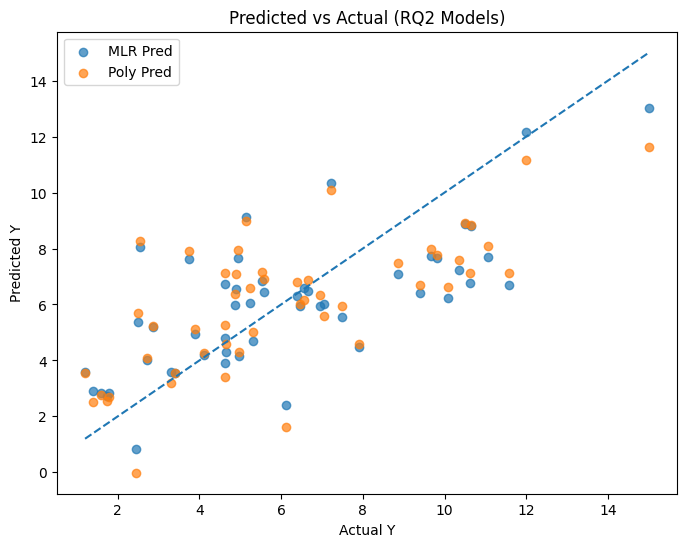

In [ ]:
# ============================
# RQ2: Model Building, Evaluation & Bootstrap CI
# ============================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
import os

# ============================
# 1) DATA PREP
# ============================

# Predictors (Predict S-II)
X_mlr = df[['S-I', 'Q_Sum']]                   # MLR (2 cols)
X_poly = df[['S-I', 'Q_Sum', 'AQ_Sum']]        # Poly (3 cols)
y = df["S-II"].astype(float)

# Train-test split
X_train_mlr, X_test_mlr, y_train, y_test = train_test_split(
    X_mlr, y, test_size=0.2, random_state=42
)

X_train_poly, X_test_poly, _, _ = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

# ============================
# 2) MODEL TRAINING
# ============================

# --- MLR
mlr = LinearRegression()
mlr.fit(X_train_mlr, y_train)

# --- Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly_expanded = poly.fit_transform(X_train_poly)
X_test_poly_expanded = poly.transform(X_test_poly)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly_expanded, y_train)

# --- Dummy (mean)
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train_mlr, y_train)

# ============================
# 3) EVALUATION FUNCTION
# ============================

def evaluate(model, X_train, X_test, y_train, y_test):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    return {
        "MAE_train": mean_absolute_error(y_train, pred_train),
        "RMSE_train": np.sqrt(mean_squared_error(y_train, pred_train)),
        "R2_train": r2_score(y_train, pred_train),

        "MAE_test": mean_absolute_error(y_test, pred_test),
        "RMSE_test": np.sqrt(mean_squared_error(y_test, pred_test)),
        "R2_test": r2_score(y_test, pred_test),
    }

# Evaluate
results_mlr = evaluate(mlr, X_train_mlr, X_test_mlr, y_train, y_test)
results_poly = evaluate(poly_reg, X_train_poly_expanded, X_test_poly_expanded, y_train, y_test)
results_dummy = evaluate(dummy, X_train_mlr, X_test_mlr, y_train, y_test)

# ============================
# 4) BOOTSTRAP CI (MAE)
# ============================

def bootstrap_mae(model, X_test, y_test, B=500):
    n = len(y_test)
    maes = []

    for _ in range(B):
        idx = np.random.choice(n, n, replace=True)

        if isinstance(X_test, pd.DataFrame):
            Xb = X_test.iloc[idx]
        else:
            Xb = X_test[idx]

        yb = y_test.iloc[idx]
        pred = model.predict(Xb)
        maes.append(mean_absolute_error(yb, pred))

    maes = np.array(maes)
    return maes.mean(), np.percentile(maes, 2.5), np.percentile(maes, 97.5)

# Compute CI
mlr_boot = bootstrap_mae(mlr, X_test_mlr, y_test)
poly_boot = bootstrap_mae(poly_reg, X_test_poly_expanded, y_test)
dummy_boot = bootstrap_mae(dummy, X_test_mlr, y_test)

# ============================
# 5) TEST METRICS TABLE
# ============================

rq2_test_results = pd.DataFrame([
    ["MultipleLinear", results_mlr["MAE_test"], results_mlr["RMSE_test"], results_mlr["R2_test"]],
    ["Polynomial_deg2", results_poly["MAE_test"], results_poly["RMSE_test"], results_poly["R2_test"]],
    ["Dummy_mean", results_dummy["MAE_test"], results_dummy["RMSE_test"], results_dummy["R2_test"]],
], columns=["Model", "MAE_test", "RMSE_test", "R2_test"])

rq2_test_results = rq2_test_results.sort_values("MAE_test").reset_index(drop=True)

print("\n===== RQ2 Test Results (sorted by MAE) =====")
print(rq2_test_results)

# ============================
# 6) BOOTSTRAP CI TABLE
# ============================

rq2_bootstrap_ci = pd.DataFrame({
    "Model": ["MultipleLinear", "Polynomial_deg2", "Dummy_mean"],
    "MAE_mean_boot": [mlr_boot[0], poly_boot[0], dummy_boot[0]],
    "MAE_CI_lower": [mlr_boot[1], poly_boot[1], dummy_boot[1]],
    "MAE_CI_upper": [mlr_boot[2], poly_boot[2], dummy_boot[2]],
})

rq2_bootstrap_ci = rq2_bootstrap_ci.sort_values("MAE_mean_boot").reset_index(drop=True)

print("\n===== RQ2 Bootstrap 95% CI (MAE) =====")
print(rq2_bootstrap_ci)


# -----------------------------
# Train vs Test metrics for best model (lowest test MAE)
# -----------------------------
best_model_name = results_df.loc[0, "Model"]
print("\nBest model on test set:", best_model_name)

# Refit fresh best model
if best_model_name == "MultipleLinear":
    best = LinearRegression().fit(X_train_mlr, y_train)
    y_train_pred = best.predict(X_train_mlr)
    y_test_pred = best.predict(X_test_mlr)
elif best_model_name == "Polynomial_deg2":
    best = LinearRegression().fit(X_train_poly, y_train)
    y_train_pred = best.predict(X_train_poly)
    y_test_pred = best.predict(X_test_poly)
else:
    best = DummyRegressor(strategy="mean").fit(X_train_mlr, y_train)
    y_train_pred = best.predict(X_train_mlr)
    y_test_pred = best.predict(X_test_mlr)

train_metrics = {
    "MAE": mean_absolute_error(y_train, y_train_pred),
    "RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "R2": r2_score(y_train, y_train_pred)
}
test_metrics = {
    "MAE": mean_absolute_error(y_test, y_test_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "R2": r2_score(y_test, y_test_pred)
}

tt_df = pd.DataFrame([
    {"Split": "Train", **train_metrics},
    {"Split": "Test", **test_metrics}
])

print("\nTrain vs Test metrics (Best Model):")
print(tt_df)
tt_df.to_csv(os.path.join(OUT_DIR, "rq2_best_train_test_metrics.csv"), index=False)



comparison = results_df.merge(ci_df, on="Model", how="left")
print("\nComparison table (test metrics + bootstrap CI):")
print(comparison)
comparison.to_csv(os.path.join(OUT_DIR, "rq2_comparison_table.csv"), index=False)



# ============================
# 7) FINAL COMPARISON TABLE (test + CI)
# ============================

rq2_comparison_table = rq2_test_results.merge(
    rq2_bootstrap_ci,
    on="Model",
    how="left"
)

print("\n===== RQ2 Comparison Table (test metrics + bootstrap CI) =====")
print(rq2_comparison_table)

# ============================
# 8) SAVE OUTPUTS
# ============================

OUT_DIR = "rq2_outputs"
os.makedirs(OUT_DIR, exist_ok=True)

rq2_test_results.to_csv(os.path.join(OUT_DIR, "rq2_test_results.csv"), index=False)
rq2_bootstrap_ci.to_csv(os.path.join(OUT_DIR, "rq2_bootstrap_mae_ci.csv"), index=False)
rq2_comparison_table.to_csv(os.path.join(OUT_DIR, "rq2_comparison_table.csv"), index=False)

print("\nAll RQ2 outputs saved to:", OUT_DIR)

# ============================
# 9) OPTIONAL PLOT
# ============================

plt.figure(figsize=(8,6))
plt.scatter(y_test, mlr.predict(X_test_mlr), label="MLR Pred", alpha=0.7)
plt.scatter(y_test, poly_reg.predict(X_test_poly_expanded), label="Poly Pred", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--")
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Predicted vs Actual (RQ2 Models)")
plt.legend()
plt.savefig(os.path.join(OUT_DIR, "rq2_pred_vs_actual_best.png"), dpi=200)
plt.show()


#Now Predicting For RQ3

Samples: 254
MLR features: ['S-I', 'S-II']
Poly features: ['S-I', 'S-II', 'Q_Sum']

Test results (sorted by MAE):
             Model  MAE_test  RMSE_test   R2_test
0   MultipleLinear  4.647666   5.639837  0.612158
1  Polynomial_deg2  4.828506   6.083244  0.548776
2       Dummy_mean  7.616962   9.125465 -0.015388

Bootstrap MAE (train-based) 95% CI:
             Model  MAE_mean_boot  MAE_CI_lower  MAE_CI_upper
0  Polynomial_deg2       4.405297      4.319043      4.546885
1   MultipleLinear       4.823656      4.736300      4.985677
2       Dummy_mean       7.096389      7.059626      7.198394

Best model on test set: MultipleLinear

Train vs Test metrics for best model:
   Split       MAE      RMSE        R2
0  Train  4.795617  5.812615  0.551782
1   Test  4.647666  5.639837  0.612158

Comparison table (test metrics + bootstrap CI):
             Model  MAE_test  RMSE_test   R2_test  MAE_mean_boot  \
0   MultipleLinear  4.647666   5.639837  0.612158       4.823656   
1  Polynomial_deg2  

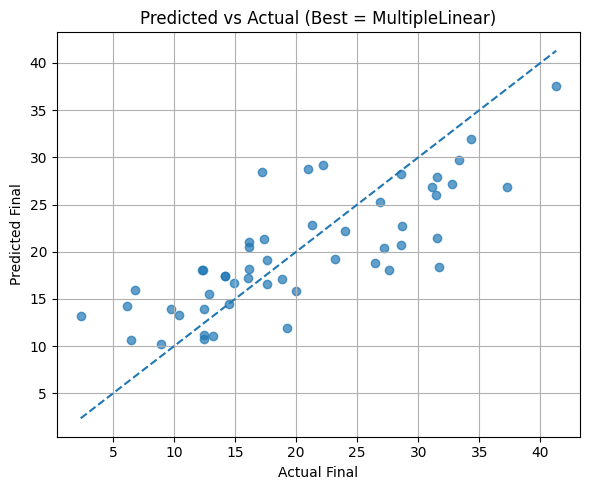


All RQ3 outputs saved to folder: rq3_outputs
Files: rq3_test_results.csv, rq3_bootstrap_mae_ci.csv, rq3_best_train_test_metrics.csv, rq3_comparison_table.csv, rq3_pred_vs_actual_best.png


In [ ]:
# RQ3: Predict Final exam (Final)
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -----------------------------
# Config
# -----------------------------
DATA_PATH = "clean_weighted_dataset.csv"
OUT_DIR = "rq3_outputs"
RANDOM_STATE = 42
TEST_SIZE = 0.20
BOOTSTRAP_SAMPLES = 500

os.makedirs(OUT_DIR, exist_ok=True)

# -----------------------------
# Load data & sanitize column names
# -----------------------------
df = pd.read_csv(DATA_PATH)
df.columns = df.columns.astype(str).str.strip()

required = ["S-I", "S-II", "Q_Sum", "A_Sum", "AQ_Sum", "Final"]
for c in ["S-I", "S-II", "Q_Sum", "Final"]:
    if c not in df.columns:
        raise ValueError(f"Required column '{c}' not found in {DATA_PATH}. Found: {df.columns.tolist()}")

# -----------------------------
# Prepare predictors + target
# -----------------------------
# MLR: S-I, S-II
X_mlr = df[["S-I", "S-II"]].astype(float)

# Poly: S-I, S-II, Q_Sum
X_poly_raw = df[["S-I", "S-II", "Q_Sum"]].astype(float)

# Target
y = pd.to_numeric(df["Final"], errors="coerce").fillna(0).astype(float)

print("Samples:", len(df))
print("MLR features:", X_mlr.columns.tolist())
print("Poly features:", X_poly_raw.columns.tolist())

# -----------------------------
# Train/test split
# -----------------------------
X_train_mlr, X_test_mlr, y_train, y_test = train_test_split(
    X_mlr, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train_poly_raw, X_test_poly_raw, _, _ = train_test_split(
    X_poly_raw, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

# -----------------------------
# Instantiate & fit models
# -----------------------------
# MLR
mlr = LinearRegression().fit(X_train_mlr, y_train)

# Polynomial (deg 2) - expand features
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_transformer.fit_transform(X_train_poly_raw)
X_test_poly = poly_transformer.transform(X_test_poly_raw)
poly_reg = LinearRegression().fit(X_train_poly, y_train)

# Dummy baseline
dummy = DummyRegressor(strategy="mean").fit(X_train_mlr, y_train)

# -----------------------------
# Evaluate on TEST set
# -----------------------------
def compute_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Predictions
y_pred_mlr_test = mlr.predict(X_test_mlr)
y_pred_poly_test = poly_reg.predict(X_test_poly)
y_pred_dummy_test = dummy.predict(X_test_mlr)

# Metrics
mlr_metrics = compute_metrics(y_test, y_pred_mlr_test)
poly_metrics = compute_metrics(y_test, y_pred_poly_test)
dummy_metrics = compute_metrics(y_test, y_pred_dummy_test)

results_df = pd.DataFrame([
    {"Model":"MultipleLinear", "MAE_test":mlr_metrics[0], "RMSE_test":mlr_metrics[1], "R2_test":mlr_metrics[2]},
    {"Model":"Polynomial_deg2", "MAE_test":poly_metrics[0], "RMSE_test":poly_metrics[1], "R2_test":poly_metrics[2]},
    {"Model":"Dummy_mean", "MAE_test":dummy_metrics[0], "RMSE_test":dummy_metrics[1], "R2_test":dummy_metrics[2]},
]).sort_values("MAE_test").reset_index(drop=True)

print("\nTest results (sorted by MAE):")
print(results_df)
results_df.to_csv(os.path.join(OUT_DIR, "rq3_test_results.csv"), index=False)

# -----------------------------
# Bootstrap on TRAIN to estimate MAE 95% CI (train-only)
# Approach: sample with replacement from X_train, fit model, evaluate MAE on ORIGINAL training set.
# -----------------------------
rng = np.random.RandomState(123)
ci_records = []

# Helper to fit fresh model instance for bootstrap
def fit_model_by_name(name, X_res, y_res):
    if name == "MultipleLinear":
        m = LinearRegression().fit(X_res, y_res)
        return m
    elif name == "Polynomial_deg2":
        # X_res must be in raw poly columns shape (n_samples x 3)
        # transform then fit
        X_res_poly = poly_transformer.transform(X_res)
        m = LinearRegression().fit(X_res_poly, y_res)
        m.poly_transformer_used = True
        return m
    else:
        return DummyRegressor(strategy="mean").fit(X_res, y_res)

# Bootstrap for each model
for name in ["MultipleLinear", "Polynomial_deg2", "Dummy_mean"]:
    maes = []
    for i in range(BOOTSTRAP_SAMPLES):
        idx = rng.choice(len(X_train_mlr), size=len(X_train_mlr), replace=True)
        # For MLR and Dummy we use X_train_mlr; for poly use X_train_poly_raw
        if name == "Polynomial_deg2":
            X_res = X_train_poly_raw.iloc[idx].reset_index(drop=True)
        else:
            X_res = X_train_mlr.iloc[idx].reset_index(drop=True)
        y_res = y_train.iloc[idx].reset_index(drop=True)

        # Fit fresh instance
        if name == "MultipleLinear":
            m_boot = LinearRegression().fit(X_res, y_res)
            y_pred_train = m_boot.predict(X_train_mlr)
        elif name == "Polynomial_deg2":
            # fit poly model on resampled raw poly inputs
            X_res_poly = poly_transformer.transform(X_res)
            m_boot = LinearRegression().fit(X_res_poly, y_res)
            # evaluate on ORIGINAL training poly expanded
            y_pred_train = m_boot.predict(poly_transformer.transform(X_train_poly_raw))
        else:  # Dummy
            m_boot = DummyRegressor(strategy="mean").fit(X_res, y_res)
            y_pred_train = m_boot.predict(X_train_mlr)

        maes.append(mean_absolute_error(y_train, y_pred_train))

    maes = np.array(maes)
    lower = np.percentile(maes, 2.5)
    upper = np.percentile(maes, 97.5)
    mean_mae = maes.mean()
    ci_records.append({
        "Model": name,
        "MAE_mean_boot": mean_mae,
        "MAE_CI_lower": lower,
        "MAE_CI_upper": upper
    })

ci_df = pd.DataFrame(ci_records).sort_values("MAE_mean_boot").reset_index(drop=True)
print("\nBootstrap MAE (train-based) 95% CI:")
print(ci_df)
ci_df.to_csv(os.path.join(OUT_DIR, "rq3_bootstrap_mae_ci.csv"), index=False)

# -----------------------------
# Train vs Test metrics for best model (lowest test MAE)
# -----------------------------
best_model_name = results_df.loc[0, "Model"]
print("\nBest model on test set:", best_model_name)

# Refit fresh best model
if best_model_name == "MultipleLinear":
    best = LinearRegression().fit(X_train_mlr, y_train)
    y_train_pred = best.predict(X_train_mlr)
    y_test_pred = best.predict(X_test_mlr)
elif best_model_name == "Polynomial_deg2":
    best = LinearRegression().fit(X_train_poly, y_train)
    y_train_pred = best.predict(X_train_poly)
    y_test_pred = best.predict(X_test_poly)
else:
    best = DummyRegressor(strategy="mean").fit(X_train_mlr, y_train)
    y_train_pred = best.predict(X_train_mlr)
    y_test_pred = best.predict(X_test_mlr)

train_metrics = {
    "MAE": mean_absolute_error(y_train, y_train_pred),
    "RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "R2": r2_score(y_train, y_train_pred)
}
test_metrics = {
    "MAE": mean_absolute_error(y_test, y_test_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "R2": r2_score(y_test, y_test_pred)
}

tt_df = pd.DataFrame([{"Split":"Train", **train_metrics}, {"Split":"Test", **test_metrics}])
print("\nTrain vs Test metrics for best model:")
print(tt_df)
tt_df.to_csv(os.path.join(OUT_DIR, "rq3_best_train_test_metrics.csv"), index=False)

# -----------------------------
# Comparison table (test metrics + bootstrap CI)
# -----------------------------
comparison = results_df.merge(ci_df, left_on="Model", right_on="Model", how="left")
print("\nComparison table (test metrics + bootstrap CI):")
print(comparison)
comparison.to_csv(os.path.join(OUT_DIR, "rq3_comparison_table.csv"), index=False)

# -----------------------------
# Predicted vs Actual plot (best model)
# -----------------------------
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_test_pred, alpha=0.7)
mn = min(y_test.min(), y_test_pred.min())
mx = max(y_test.max(), y_test_pred.max())
plt.plot([mn,mx],[mn,mx], linestyle="--")
plt.xlabel("Actual Final")
plt.ylabel("Predicted Final")
plt.title(f"Predicted vs Actual (Best = {best_model_name})")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "rq3_pred_vs_actual_best.png"), dpi=200)
plt.show()

print("\nAll RQ3 outputs saved to folder:", OUT_DIR)
print("Files: rq3_test_results.csv, rq3_bootstrap_mae_ci.csv, rq3_best_train_test_metrics.csv, rq3_comparison_table.csv, rq3_pred_vs_actual_best.png")
